In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display maximum Rows and Columns
pd.set_option('display.max_columns', None)

In [2]:
# load the production dataset

Production = pd.read_csv(r"C:\Users\hp\Downloads\Africa_Food_Production.csv")
Production.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [3]:
# add a new coulmn named food category
# Streamline the food items into category to make the analysis easy to comprehend.
food_item_category_mapping = {
    'Cereals and Grains': ['Wheat and products', 'Rice (Milled Equivalent)', 'Barley and products', 'Maize and products', 
                           'Oats','Sorghum and products', 'Cereals, Other', 'Millet and products', 'Rye and products'],
    
    'Roots and Tubers': ['Yams', 'Sweet potatoes', 'Roots, Other', 'Cassava and products', 'Potatoes and products'],
    
    'Spices and Condiments': ['Pepper', 'Pimento', 'Spices, Other', 'Cloves'],
    
    'Fruits':      ['Oranges, Mandarines', 'Lemons, Limes and products', 'Pineapples and products', 'Bananas', 'Dates',
                   'Grapes and products (excl wine)', 'Grapefruit and products', 'Citrus, Other', 'Apples and products', 
                    'Fruits, Other', 'Plantains'], 
    
    'Sugar and Sweeteners': ['Sugar beet', 'Sugar (Raw Equivalent)', 'Honey', 'Sweeteners, Other', 'Sugar cane', 
                             'Sugar non-centrifugal'],
    
    'Legumes and Nuts': ['Beans', 'Peas', 'Pulses, Other and products', 'Nuts and products', 
                         'Groundnuts (Shelled Eq)', 'Soyabeans', 'Sesame seed'],
     
    'Fish and Seafood': ['Freshwater Fish', 'Demersal Fish', 'Pelagic Fish', 'Marine Fish, Other', 
                         'Fish, Body Oil', 'Fish, Liver Oil', 'Aquatic Animals, Others', 
                         'Crustaceans', 'Cephalopods', 'Molluscs, Other', 'Aquatic Plants'],
     
    'Meat and Animal Products': ['Bovine Meat', 'Mutton & Goat Meat', 'Pigmeat', 'Poultry Meat', 'Meat, Other', 'Cream',
                            'Offals, Edible', 'Butter, Ghee', 'Fats, Animals, Raw', 'Milk - Excluding Butter', 'Eggs'],
    
    'Oilseeds and Oils': ['Sunflower seed', 'Rape and Mustardseed', 'Cottonseed', 'Olives (including preserved)', 
                          'Groundnut Oil', 'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Olive Oil', 'Palm Oil',
                           'Oilcrops Oil, Other', 'Cottonseed Oil', 'Palmkernel Oil','Soyabean Oil', 'Maize Germ Oil',
                          'Coconut Oil', 'Sesameseed Oil', 'Palm kernels', 'Oilcrops, Other', 'Coconuts - Incl Copra'],
    'Vegetables': ['Tomatoes and products', 'Onions', 'Vegetables, Other'],
    'Beverages': ['Wine', 'Beer', 'Beverages, Alcoholic', 'Beverages, Fermented', 'Coffee and products', 
                  'Tea (including mate)', 'Alcohol, Non-Food', 'Cocoa Beans and products']
}

# Reverse the dictionary to map each food item to its category
food_item_to_category = {item: category for category, items in food_item_category_mapping.items() for item in items}

# Assuming df is your DataFrame
Production['food_category'] = Production['Item'].map(food_item_to_category)

# Display the result
Production.head()

,Country,Item,Year,Value,food_category
0,Algeria,Wheat and products,2004,2731,Cereals and Grains
1,Algeria,Wheat and products,2005,2415,Cereals and Grains
2,Algeria,Wheat and products,2006,2688,Cereals and Grains
3,Algeria,Wheat and products,2007,2319,Cereals and Grains
4,Algeria,Wheat and products,2008,1111,Cereals and Grains


In [4]:
# Reshape the DataFrame
# turning unique values in the food category into multiple columns
Production_pivot = Production.pivot_table(index=['Country', 'Year'], columns='food_category', values='Value', fill_value=0).reset_index()

# Flatten the columns
Production_pivot.columns.name = None  # Remove the aggregation label
Production_pivot.columns = [f'{col}' if col in ['Country', 'Year'] else f'{col}_value' for col in Production_pivot.columns]

Production_pivot.head()

,Country,Year,Beverages_value,Cereals and Grains_value,Fish and Seafood_value,Fruits_value,Legumes and Nuts_value,Meat and Animal Products_value,Oilseeds and Oils_value,Roots and Tubers_value,Spices and Condiments_value,Sugar and Sweeteners_value,Vegetables_value
0,Algeria,2004,65.000000,576.285714,16.428571,220.111111,19.8,251.9,65.555556,1896.0,6.0,1.0,1366.000000
1,Algeria,2005,69.333333,504.000000,18.142857,253.333333,18.8,261.5,46.222222,2157.0,8.0,1.0,1410.333333
2,Algeria,2006,76.666667,573.857143,20.714286,287.777778,20.0,283.9,39.777778,2181.0,9.0,1.0,1315.000000
3,Algeria,2007,60.666667,514.571429,20.857143,242.777778,17.2,284.7,32.555556,1507.0,6.0,1.0,1302.000000
4,Algeria,2008,63.666667,219.428571,20.285714,290.666667,16.6,282.9,40.666667,2171.0,8.0,1.0,1298.666667


In [5]:
# Rename columns to remove the '_value' suffix using regular expressions

import re

Production_pivot.rename(columns=lambda x: re.sub(r'_value$', '', x), inplace=True)
Production_pivot.head()

,Country,Year,Beverages,Cereals and Grains,Fish and Seafood,Fruits,Legumes and Nuts,Meat and Animal Products,Oilseeds and Oils,Roots and Tubers,Spices and Condiments,Sugar and Sweeteners,Vegetables
0,Algeria,2004,65.000000,576.285714,16.428571,220.111111,19.8,251.9,65.555556,1896.0,6.0,1.0,1366.000000
1,Algeria,2005,69.333333,504.000000,18.142857,253.333333,18.8,261.5,46.222222,2157.0,8.0,1.0,1410.333333
2,Algeria,2006,76.666667,573.857143,20.714286,287.777778,20.0,283.9,39.777778,2181.0,9.0,1.0,1315.000000
3,Algeria,2007,60.666667,514.571429,20.857143,242.777778,17.2,284.7,32.555556,1507.0,6.0,1.0,1302.000000
4,Algeria,2008,63.666667,219.428571,20.285714,290.666667,16.6,282.9,40.666667,2171.0,8.0,1.0,1298.666667


In [6]:
# Calculate the total production by summing all relevant columns

Production_pivot['total_produced'] = Production_pivot.iloc[:, 2:].sum(axis=1)
Production_pivot.head()

,Country,Year,Beverages,Cereals and Grains,Fish and Seafood,Fruits,Legumes and Nuts,Meat and Animal Products,Oilseeds and Oils,Roots and Tubers,Spices and Condiments,Sugar and Sweeteners,Vegetables,total_produced
0,Algeria,2004,65.000000,576.285714,16.428571,220.111111,19.8,251.9,65.555556,1896.0,6.0,1.0,1366.000000,4484.080952
1,Algeria,2005,69.333333,504.000000,18.142857,253.333333,18.8,261.5,46.222222,2157.0,8.0,1.0,1410.333333,4747.665079
2,Algeria,2006,76.666667,573.857143,20.714286,287.777778,20.0,283.9,39.777778,2181.0,9.0,1.0,1315.000000,4808.693651
3,Algeria,2007,60.666667,514.571429,20.857143,242.777778,17.2,284.7,32.555556,1507.0,6.0,1.0,1302.000000,3989.328571
4,Algeria,2008,63.666667,219.428571,20.285714,290.666667,16.6,282.9,40.666667,2171.0,8.0,1.0,1298.666667,4412.880952


In [7]:
# load the supply dataset

supply = pd.read_csv(r"C:\Users\hp\Downloads\Africa_Food_Supply.csv")
supply.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [8]:
# rename the Value to total supply

supply.rename(columns={"Value":"total_supply"}, inplace=True)
supply.head()

,Country,Year,total_supply
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [9]:
# Merge the production and supply datset

df = Production_pivot.merge(supply, how='left', on=["Country", "Year"])
df.head()

,Country,Year,Beverages,Cereals and Grains,Fish and Seafood,Fruits,Legumes and Nuts,Meat and Animal Products,Oilseeds and Oils,Roots and Tubers,Spices and Condiments,Sugar and Sweeteners,Vegetables,total_produced,total_supply
0,Algeria,2004,65.000000,576.285714,16.428571,220.111111,19.8,251.9,65.555556,1896.0,6.0,1.0,1366.000000,4484.080952,2987
1,Algeria,2005,69.333333,504.000000,18.142857,253.333333,18.8,261.5,46.222222,2157.0,8.0,1.0,1410.333333,4747.665079,2958
2,Algeria,2006,76.666667,573.857143,20.714286,287.777778,20.0,283.9,39.777778,2181.0,9.0,1.0,1315.000000,4808.693651,3047
3,Algeria,2007,60.666667,514.571429,20.857143,242.777778,17.2,284.7,32.555556,1507.0,6.0,1.0,1302.000000,3989.328571,3041
4,Algeria,2008,63.666667,219.428571,20.285714,290.666667,16.6,282.9,40.666667,2171.0,8.0,1.0,1298.666667,4412.880952,3048


In [10]:
df.columns = df.columns.str.lower()

In [11]:
# add a new column for Sub-region as my focus will be on Northern Africa

sub_region_mapping = {
    'North Africa': ['Algeria', 'Egypt', 'Morocco', 'Tunisia', 'Sudan'],
    'West Africa': ['Benin', 'Burkina Faso', 'Cabo Verde', "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 
                    'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 
                    'Sierra Leone', 'Togo'],
    'East Africa': ['Djibouti', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 
                    'Rwanda', 'Uganda', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe'],
    'Central Africa': ['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo', 'Gabon', 
                       'Sao Tome and Principe'],
    'Southern Africa': ['Botswana', 'Swaziland', 'Lesotho', 'Namibia', 'South Africa']
}

# Reverse the dictionary to map each country to its sub-region
country_to_region = {country: region for region, countries in sub_region_mapping.items() for country in countries}


# Map countries to regions
df['sub-region'] = df['country'].map(country_to_region)

# Display the result
df.head()

,country,year,beverages,cereals and grains,fish and seafood,fruits,legumes and nuts,meat and animal products,oilseeds and oils,roots and tubers,spices and condiments,sugar and sweeteners,vegetables,total_produced,total_supply,sub-region
0,Algeria,2004,65.000000,576.285714,16.428571,220.111111,19.8,251.9,65.555556,1896.0,6.0,1.0,1366.000000,4484.080952,2987,North Africa
1,Algeria,2005,69.333333,504.000000,18.142857,253.333333,18.8,261.5,46.222222,2157.0,8.0,1.0,1410.333333,4747.665079,2958,North Africa
2,Algeria,2006,76.666667,573.857143,20.714286,287.777778,20.0,283.9,39.777778,2181.0,9.0,1.0,1315.000000,4808.693651,3047,North Africa
3,Algeria,2007,60.666667,514.571429,20.857143,242.777778,17.2,284.7,32.555556,1507.0,6.0,1.0,1302.000000,3989.328571,3041,North Africa
4,Algeria,2008,63.666667,219.428571,20.285714,290.666667,16.6,282.9,40.666667,2171.0,8.0,1.0,1298.666667,4412.880952,3048,North Africa


In [12]:
df['sub-region'].unique()

array(['North Africa', 'Central Africa', 'West Africa', 'Southern Africa',
       'East Africa'], dtype=object)

In [13]:
# check for missing values
df.isnull().sum()

country                     0
year                        0
beverages                   0
cereals and grains          0
fish and seafood            0
fruits                      0
legumes and nuts            0
meat and animal products    0
oilseeds and oils           0
roots and tubers            0
spices and condiments       0
sugar and sweeteners        0
vegetables                  0
total_produced              0
total_supply                0
sub-region                  0
dtype: int64

In [14]:
# check for duplicates
df.duplicated().any()

False

In [15]:
# Countries by Sub-region
# Drop duplicates to count unique countries per region
countries_per_sub_region = df.drop_duplicates(subset='country').groupby('sub-region')['country'].count()

# Display the result
print(countries_per_sub_region)

sub-region
Central Africa      7
East Africa        12
North Africa        5
Southern Africa     5
West Africa        16
Name: country, dtype: int64


Insght: This shows that West Africa has the highest number of countries

In [16]:
# Filter for Northern sub-region (As my focus is on Northern Africa)

df_north_africa = df[df['sub-region'] == 'North Africa']

In [17]:
# Basic statistics (Descriptive Statistics)
df_north_africa.describe()

,year,beverages,cereals and grains,fish and seafood,fruits,legumes and nuts,meat and animal products,oilseeds and oils,roots and tubers,spices and condiments,sugar and sweeteners,vegetables,total_produced,total_supply
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,2008.500000,94.476667,1197.638952,52.159429,448.476286,102.582714,482.628222,84.284913,1050.908333,18.300000,1639.893333,2331.720000,7503.068849,3099.16000
std,2.901442,97.569427,1135.665964,49.678090,329.450537,114.641322,300.725193,30.947892,1124.930302,12.086001,1884.041330,2035.088743,5593.356698,413.27035
min,2004.000000,24.500000,219.428571,8.428571,129.875000,16.600000,114.454545,32.555556,137.500000,5.000000,1.000000,783.000000,1977.715152,2271.00000
25%,2006.000000,30.875000,506.200000,11.638889,255.425000,34.750000,254.375000,57.427083,342.500000,9.000000,1.666667,1031.916667,4285.149405,3042.50000
50%,2008.500000,62.625000,718.000000,17.285714,351.285714,59.928571,376.850000,81.672222,521.166667,13.250000,801.300000,1483.833333,5589.309524,3271.00000
75%,2011.000000,76.562500,1082.233333,100.325000,421.892857,91.892857,758.704545,109.457143,1475.083333,28.375000,2732.750000,1931.166667,7235.362798,3357.25000
max,2013.000000,377.500000,3702.833333,145.400000,1196.666667,538.750000,984.666667,144.000000,4928.000000,48.000000,5602.000000,7117.333333,19712.645022,3561.00000


In [18]:
df_north_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 409
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   50 non-null     object 
 1   year                      50 non-null     int64  
 2   beverages                 50 non-null     float64
 3   cereals and grains        50 non-null     float64
 4   fish and seafood          50 non-null     float64
 5   fruits                    50 non-null     float64
 6   legumes and nuts          50 non-null     float64
 7   meat and animal products  50 non-null     float64
 8   oilseeds and oils         50 non-null     float64
 9   roots and tubers          50 non-null     float64
 10  spices and condiments     50 non-null     float64
 11  sugar and sweeteners      50 non-null     float64
 12  vegetables                50 non-null     float64
 13  total_produced            50 non-null     float64
 14  total_supply    

In [19]:
df_north_africa.shape

(50, 16)

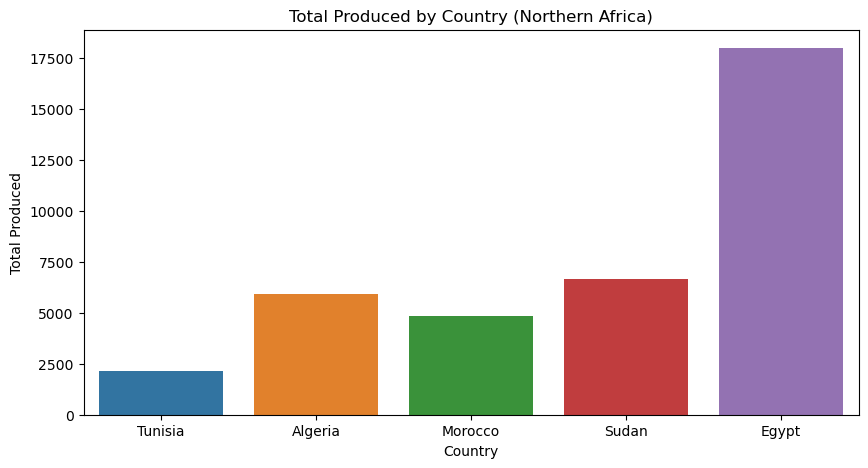

In [20]:
# 1. Total Produce by Country in Northen Africa
df_north_africa = df_north_africa.sort_values('total_produced')

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='country', y='total_produced', data=df_north_africa, errorbar=None)
plt.title('Total Produced by Country (Northern Africa)')
plt.xlabel('Country')
plt.ylabel('Total Produced')


plt.show()

Insight: Egypt leads with the highest total production at 19,712 units, followed by Algeria (9,004), Sudan (7,230), Morocco (5,378), and Tunisia with the least production at 2,409 units. This indicates significant disparities in agricultural productivity among countries in Northern Africa.

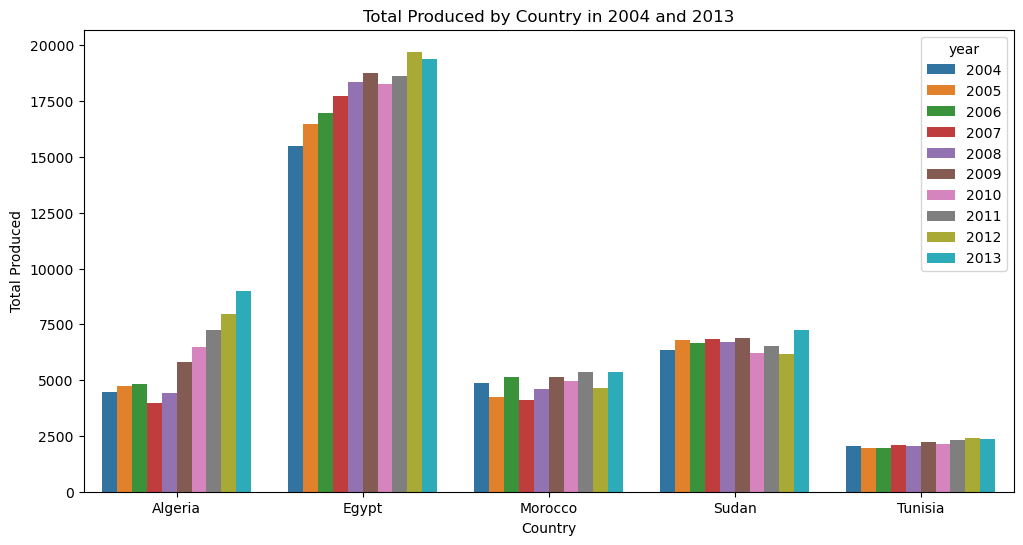

In [21]:
# 2. Total produce by country and year
total_produce_by_country = df_north_africa.groupby(['country', 'year'])['total_produced'].sum().reset_index()

# Plot total produce by country
plt.figure(figsize=(12, 6))
sns.barplot(data=total_produce_by_country, x='country', y='total_produced', hue='year')
plt.title('Total Produced by Country in 2004 and 2013')
plt.xlabel('Country')
plt.ylabel('Total Produced')
plt.show()

Insight: Egypt consistently appears as the largest producer across various food categories, highlighting its leading role in the region’s agricultural output.

In [35]:
# 3. Relationship between production and supply
# Scatter plot for the relationship between total production and total supply
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_north_africa, x='total_produced', y='total_supply')
plt.title('Relationship between Total Production and Total Supply in North Africa')
plt.xlabel('Total Produced')
plt.ylabel('Total Supply')
plt.show()

# Calculate the correlation coefficient
correlation = df_north_africa['total_produced'].corr(df_north_africa['total_supply'])
print(f'Correlation between total production and total supply: {correlation}')

Correlation between total production and total supply: 0.2707670465752983


Insight: A correlation coefficient of 0.27 between total production and total supply indicates a weak positive linear relationship. Indicating that as total production increases, total supply tends to increase as well, but the relationship is not strong.
Other Factors: Other factors, such as import/export policies, local demand fluctuations, storage capacities, and external market influences, could be playing significant roles in determining the total supply.

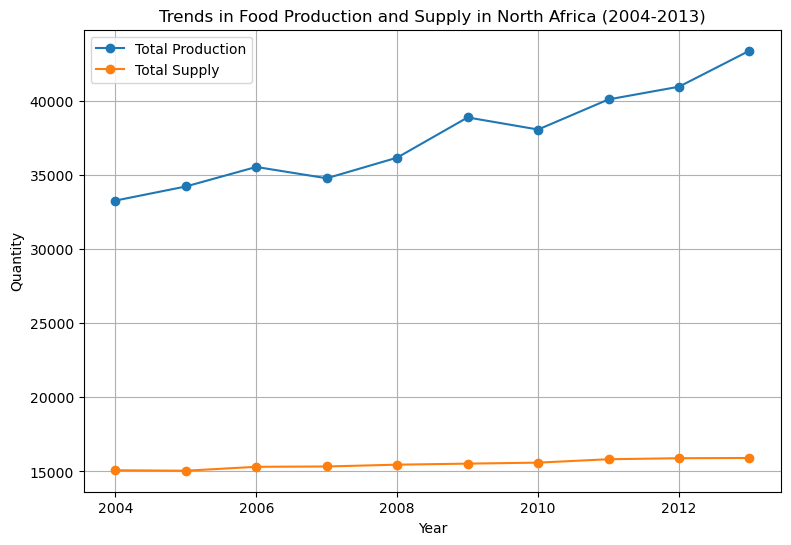

In [23]:
# 4.  Trends in food production and supply
# Group by year and calculate the total production and supply for North Africa
annual_data = df_north_africa.groupby('year')[['total_produced', 'total_supply']].sum().reset_index()

# Plot trends over the years
plt.figure(figsize=(9, 6))
plt.plot(annual_data['year'], annual_data['total_produced'], marker='o', label='Total Production')
plt.plot(annual_data['year'], annual_data['total_supply'], marker='o', label='Total Supply')
plt.title('Trends in Food Production and Supply in North Africa (2004-2013)')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()


Insight: There has been an upward trend in food production, with 2013 showing the highest production levels. This trend suggests improvements in agricultural practices and possibly increased investment in the agricultural sector over the decade. While the total supply levels have been relatively stable compared to production, with supply ranging from 15,000 to 16,000 units. The disparity between production and supply indicates that not all produced food is reaching the market, potentially due to consumption, wastage, or other factors.

In [24]:
# 5. Calculate descriptive statistics for food production in North Africa
production_stats = df_north_africa['total_produced'].describe()
q1 = production_stats['25%']
q3 = production_stats['75%']
iqr = q3 - q1

# Identify outliers
outliers = df_north_africa[(df_north_africa['total_produced'] < (q1 - 1.5 * iqr)) | (df_north_africa['total_produced'] > (q3 + 1.5 * iqr))]

print("Descriptive Statistics for Total Production in North Africa:")
print(production_stats)
print("\nOutliers in Total Production:")
print(outliers)

Descriptive Statistics for Total Production in North Africa:
count       50.000000
mean      7503.068849
std       5593.356698
min       1977.715152
25%       4285.149405
50%       5589.309524
75%       7235.362798
max      19712.645022
Name: total_produced, dtype: float64

Outliers in Total Production:
    country  year  beverages  cereals and grains  fish and seafood  \
120   Egypt  2004      76.25         3118.000000              86.5   
121   Egypt  2005      78.00         3397.333333              88.9   
122   Egypt  2006      62.25         3378.166667              97.0   
123   Egypt  2007      87.25         3218.166667             100.8   
126   Egypt  2010      71.50         3003.833333             130.5   
124   Egypt  2008      68.00         3554.500000             106.6   
127   Egypt  2011      46.00         3354.000000             136.3   
125   Egypt  2009      66.50         3486.333333             109.3   
129   Egypt  2013      43.25         3702.833333             145.

Insight: The descriptive statistics for total production in North Africa show a dataset with high variability and a right-skewed distribution. The mean is higher than the median, suggesting that a few high production values are increasing the average. There is a wide range of production values, and the high standard deviation indicates significant differences between observations. The presence of outliers is evident from the large gap between the maximum value and the third quartile.

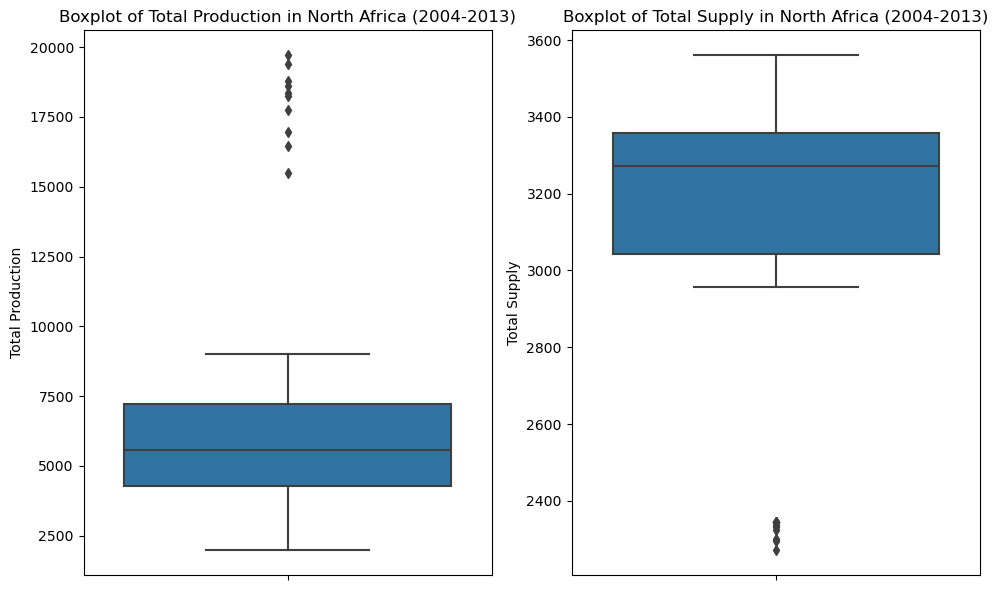

In [26]:
# 6. Average and median food production, the outliers, Quartile and interquartile ranges. 
# Boxplot for total production
plt.figure(figsize=(10, 6))

# Boxplot for total production
plt.subplot(1, 2, 1)
sns.boxplot(y='total_produced', data=df_north_africa)
plt.title('Boxplot of Total Production in North Africa (2004-2013)')
plt.ylabel('Total Production')

# Boxplot for total supply
plt.subplot(1, 2, 2)
sns.boxplot(y='total_supply', data=df_north_africa)
plt.title('Boxplot of Total Supply in North Africa (2004-2013)')
plt.ylabel('Total Supply')

# Display the plots
plt.tight_layout()
plt.show()


Total Production: the data shows a diverse distribution of total produced values with a significant difference between the lower and upper ends. The high maximum value compared to the upper fence indicates occasional spikes in production, which may be due to exceptional circumstances or reporting anomalies. The median being closer to the first quartile suggests a right-skewed distribution, where a majority of the data points are concentrated at the lower end, with a few high outliers pulling the mean upwards. This right-skewed nature suggests that while most countries or regions in North Africa have moderate production levels, there are a few instances with exceptionally high production.

Total Supply:
Skewness Towards Higher Values: The median (3217) being closer to Q1 (3041) and a longer upper whisker indicate a slightly skewed distribution towards higher values.
Presence of Outliers: The lower minimum value (2271) suggests occasional sharp drops in supply, highlighting inconsistencies that could affect food security.

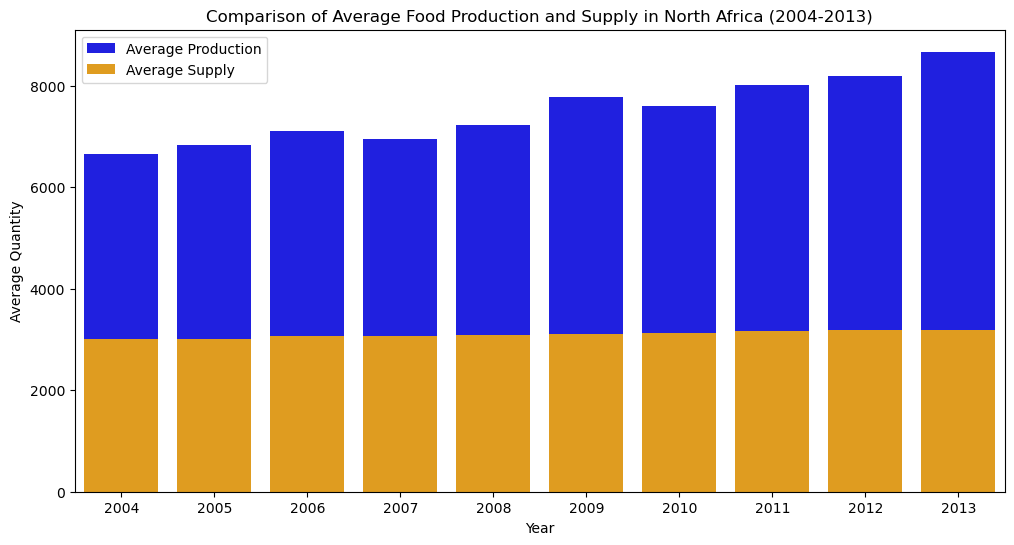

In [27]:
# 7. A comparison between average food consumption and production for each year.
# Group by year and calculate the mean production and supply for North Africa
average_data = df_north_africa.groupby('year')[['total_produced', 'total_supply']].mean().reset_index()

# Plot comparison of average production and supply
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='total_produced', data=average_data, color='blue', label='Average Production')
sns.barplot(x='year', y='total_supply', data=average_data, color='orange', label='Average Supply')
plt.title('Comparison of Average Food Production and Supply in North Africa (2004-2013)')
plt.xlabel('Year')
plt.ylabel('Average Quantity')
plt.legend()
plt.show()

The average food production and supply shows 2013 with the highest average food production as at 8,671 with Year 2004 with the lowest. For the food supply; the average ranges from 3015 to 3181 with Year 2013 as the highest.

In [28]:
# Ensure the data frame has the correct column names
print(df.columns)

Index(['country', 'year', 'beverages', 'cereals and grains',
       'fish and seafood', 'fruits', 'legumes and nuts',
       'meat and animal products', 'oilseeds and oils', 'roots and tubers',
       'spices and condiments', 'sugar and sweeteners', 'vegetables',
       'total_produced', 'total_supply', 'sub-region'],
      dtype='object')


In [29]:
# Ensure the column names match exactly with those in the DataFrame
df_melted = pd.melt(df, 
                    id_vars=['country', 'year', 'total_produced', 'total_supply', 'sub-region'], 
                    value_vars=['beverages', 'cereals and grains', 'fish and seafood', 'fruits', 
                                'legumes and nuts', 'meat and animal products', 'oilseeds and oils', 
                                'roots and tubers', 'spices and condiments', 'sugar and sweeteners', 
                                'vegetables'],
                    var_name='food_category', 
                    value_name='value')

# Display the result
df_melted.head()

,country,year,total_produced,total_supply,sub-region,food_category,value
0,Algeria,2004,4484.080952,2987,North Africa,beverages,65.000000
1,Algeria,2005,4747.665079,2958,North Africa,beverages,69.333333
2,Algeria,2006,4808.693651,3047,North Africa,beverages,76.666667
3,Algeria,2007,3989.328571,3041,North Africa,beverages,60.666667
4,Algeria,2008,4412.880952,3048,North Africa,beverages,63.666667


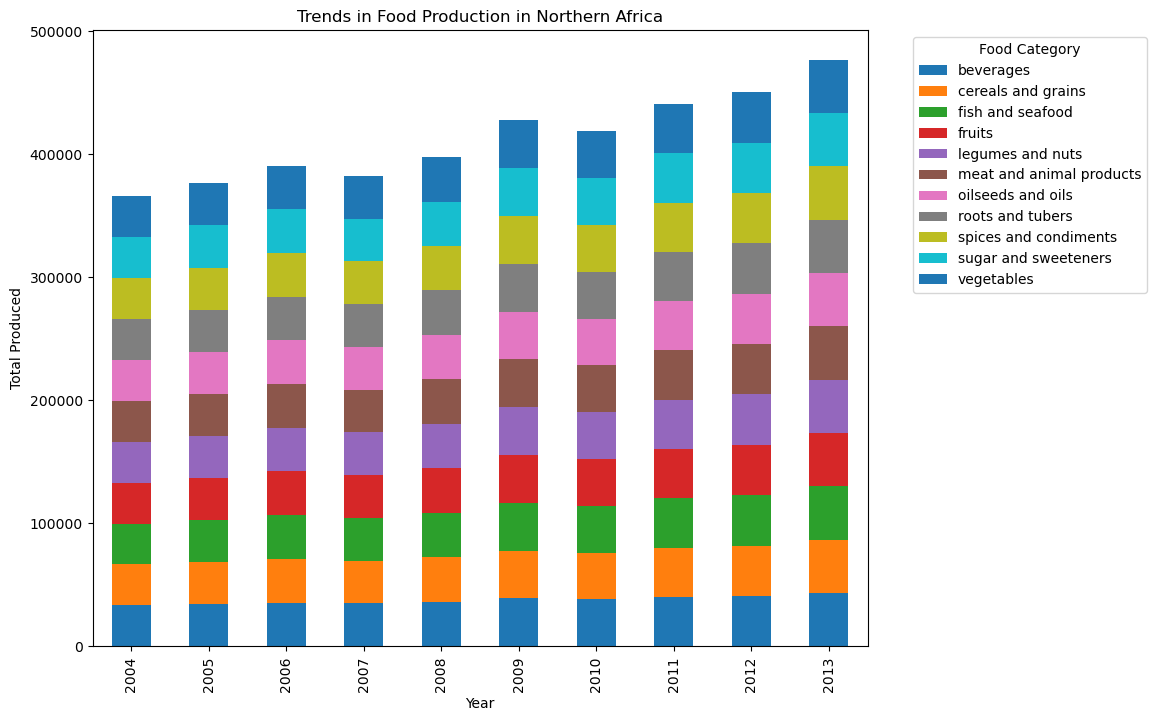

In [30]:
# Filter for North Africa region
df_north_africa = df_melted[df_melted['sub-region'] == 'North Africa']

# Aggregate data by year and food category
df_agg = df_north_africa.groupby(['year', 'food_category']).total_produced.sum().reset_index()

# Pivot the data to have years as index and food categories as columns
df_pivot = df_agg.pivot(index='year', columns='food_category', values='total_produced').fillna(0)

# Plotting the stacked bar plot
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Trends in Food Production in Northern Africa')
plt.xlabel('Year')
plt.ylabel('Total Produced')
plt.legend(title='Food Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Top 5 and bottom 5 food category

Top 5 Produced Food Category:
               food_category          value
0                vegetables  116586.000000
1      sugar and sweeteners   81994.666667
2        cereals and grains   59881.947619
3          roots and tubers   52545.416667
4  meat and animal products   24131.411111
Bottom 5 Produced Food Category:
            food_category        value
0  spices and condiments   915.000000
1       fish and seafood  2607.971429
2      oilseeds and oils  4214.245635
3              beverages  4723.833333
4       legumes and nuts  5129.135714


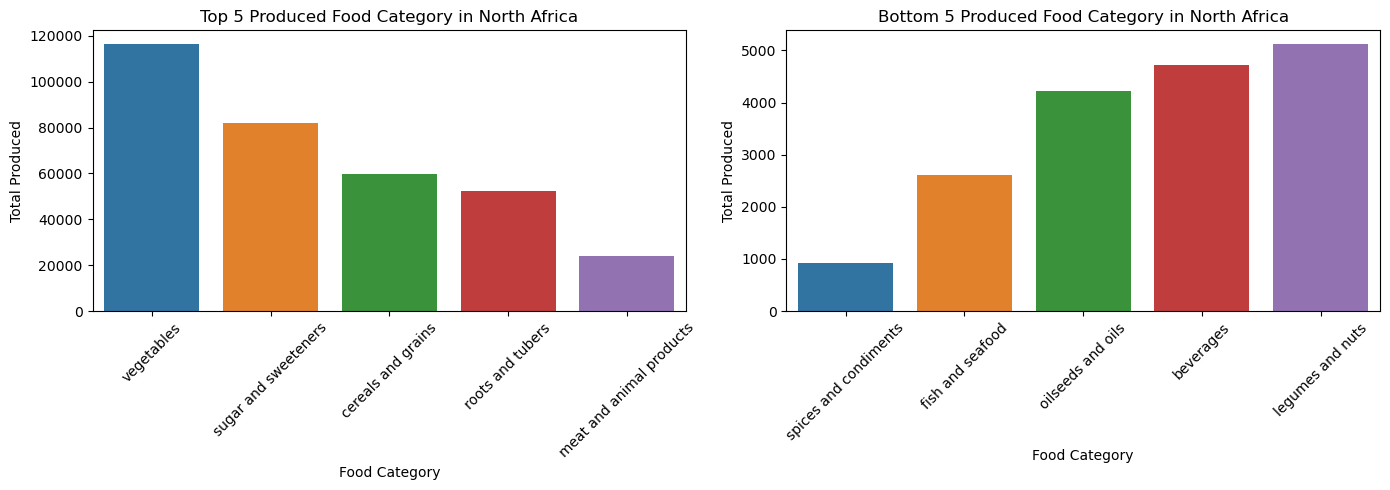

In [31]:
# 8. Top 5 and bottom 5 food category by production
top_produced = df_north_africa.groupby('food_category')['value'].sum().nlargest(5).reset_index()
bottom_produced = df_north_africa.groupby('food_category')['value'].sum().nsmallest(5).reset_index()

print("Top 5 Produced Food Category:\n", top_produced)

print("Bottom 5 Produced Food Category:\n", bottom_produced)

# Visualizing top and bottom food items by production
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Top 5 Produced Food Items
sns.barplot(data=top_produced, x='food_category', y='value', ax=ax[0])
ax[0].set_title('Top 5 Produced Food Category in North Africa')
ax[0].set_xlabel('Food Category')
ax[0].set_ylabel('Total Produced')
ax[0].tick_params(axis='x', rotation=45)

# Bottom 5 Produced Food Items
sns.barplot(data=bottom_produced, x='food_category', y='value', ax=ax[1])
ax[1].set_title('Bottom 5 Produced Food Category in North Africa')
ax[1].set_xlabel('Food Category')
ax[1].set_ylabel('Total Produced')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Insights: Vegetables are the top produced food category, followed closely by sugar and sweeteners. Spices and condiments are at the bottom of the production scale, indicating a focus on staple and high-demand food items over niche categories.

Change in Production of Key Food Items from 2004 to 2013:
 year             food_category          2004          2005          2006  \
0           cereals and grains   5665.863492   5833.755556   6272.057143   
1                       fruits   1868.525397   1966.013095   2140.689683   
2     meat and animal products   2144.117172   2217.237374   2283.089899   
3             roots and tubers   3910.250000   4348.416667   4159.250000   
4         sugar and sweeteners   7639.633333   7849.750000   7797.766667   
5                   vegetables  10432.333333  10450.000000  11240.000000   

year          2007          2008          2009          2010          2011  \
0      5528.793651   5486.873016   6832.395238   5258.460317   6251.726984   
1      2041.436111   2139.334127   2320.540476   2314.827778   2452.182540   
2      2393.174747   2435.020202   2454.664646   2560.906061   2632.730303   
3      3565.833333   4531.583333   4923.083333   5765.500000   6558.833333   
4      8402.950000

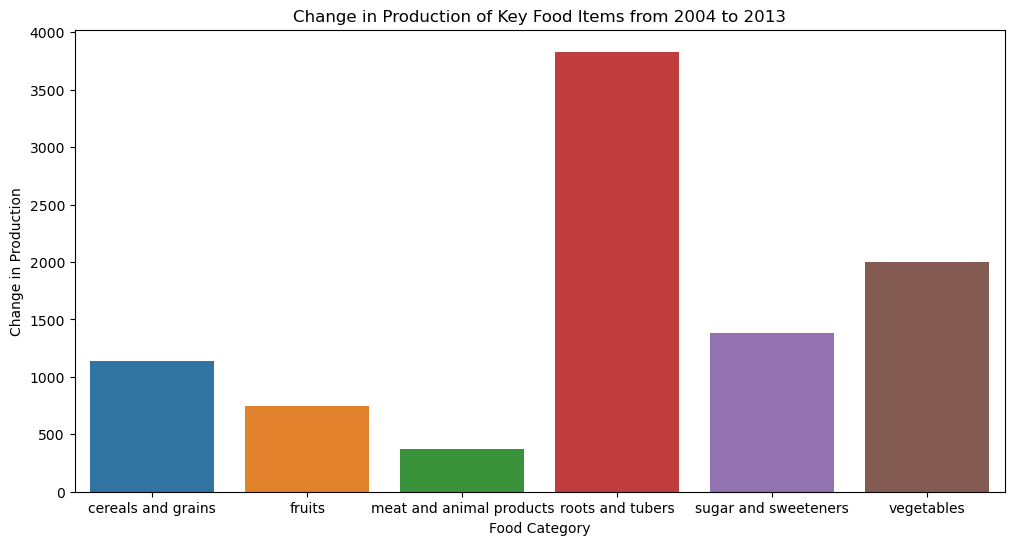

In [32]:
# 9. Change in total production of key food items between 2004 and 2013
top_produced_2004 = df_north_africa[df_north_africa['year'] == 2004].groupby('food_category')['value'].sum().nlargest(5).reset_index()
top_produced_2013 = df_north_africa[df_north_africa['year'] == 2013].groupby('food_category')['value'].sum().nlargest(5).reset_index()


key_food_items = set(top_produced_2004['food_category']).union(set(top_produced_2013['food_category']))
df_key_food_items = df_north_africa[df_north_africa['food_category'].isin(key_food_items)]

change_in_production = df_key_food_items.groupby(['food_category', 'year'])['value'].sum().unstack().reset_index()
change_in_production['change'] = change_in_production[2013] - change_in_production[2004]
print("Change in Production of Key Food Items from 2004 to 2013:\n", change_in_production)

# Plot change in production
plt.figure(figsize=(12, 6))
sns.barplot(data=change_in_production, x='food_category', y='change')
plt.title('Change in Production of Key Food Items from 2004 to 2013')
plt.xlabel('Food Category')
plt.ylabel('Change in Production')
plt.show()

In [33]:
# 10. Differences in food production and supply between 2004 and 2013
production_difference = df_north_africa.groupby(['food_category', 'year'])['total_produced'].sum().unstack().reset_index()
production_difference['difference'] = production_difference[2013] - production_difference[2004]

supply_difference = df_north_africa.groupby(['food_category', 'year'])['total_supply'].sum().unstack().reset_index()
supply_difference['difference'] = supply_difference[2013] - supply_difference[2004]

print("Production Difference between 2004 and 2013:\n", production_difference)
print("Supply Difference between 2004 and 2013:\n", supply_difference)

Production Difference between 2004 and 2013:
 year             food_category          2004         2005          2006  \
0                    beverages  33254.190188  34205.39412  35522.103788   
1           cereals and grains  33254.190188  34205.39412  35522.103788   
2             fish and seafood  33254.190188  34205.39412  35522.103788   
3                       fruits  33254.190188  34205.39412  35522.103788   
4             legumes and nuts  33254.190188  34205.39412  35522.103788   
5     meat and animal products  33254.190188  34205.39412  35522.103788   
6            oilseeds and oils  33254.190188  34205.39412  35522.103788   
7             roots and tubers  33254.190188  34205.39412  35522.103788   
8        spices and condiments  33254.190188  34205.39412  35522.103788   
9         sugar and sweeteners  33254.190188  34205.39412  35522.103788   
10                  vegetables  33254.190188  34205.39412  35522.103788   

year          2007          2008          2009       

Insight: Yes, there are significant differences. Production has increased considerably by 2013, while supply has not seen a commensurate rise, indicating possible inefficiencies or increased internal consumption.